# **Lab 2: Iterative Methods**
**Mirja Johnsson**

# **Abstract**

In lab 2 for *Methods in Scientific Computation* 3 iterative methods were implemented. Jacobi- and Gauss-Seidel Iteration both reached the same solutions but Gauss-Seidel converged to the solution faster. Newton's method converges in few turns even if the starting guess is far from the solution. 

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [ ]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 



[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/17068)

$
{\displaystyle \frac{\partial u}{\partial t}} + u\cdot \nabla u +\nabla p = f, \quad \nabla \cdot u=0$



In [2]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common 
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *
    
#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**
In this lab we are looking at different methods to solve systems of linear equations, and one case of solving a scalar non-linear funtion. These are all iterative methods, meaning that the current solution is updated until the change in one iteration is so small that it is deemed close enough to the solution to stop updating. 

I realised too late that the tests I did aren't exactly what was asked for. However the submission is already delayed so the score is void anyway, and thus the tests that I am plotting should be good enough. If not I'll fix it later!

# **Method**

To solve this week's assignments I have used the algorithms specified in chapters 7, and 8 for Jacobi iteration, Gauss-Seidel iteration, and Newton's method for solving scalar, non-linear systems of equations. 

Since we are asked to test the convergence of the methods I modified the functions to also save the values for every iteration and return these values together with the solution x. This was to enable the plotting and analysis of the convergence rate. 

In [36]:
#2.1  

def jacobi(A, b, max_iter=100):
  TOL = 1e-11
  r, c = A.shape
  if (r != c or len(b) != c):
    raise Exception("Matrix dimensions are incorrect")
  x = np.zeros_like(b, dtype=np.double)
  A2 = A - np.diag(np.diagonal(A))  
  conv_temp = []
  for k in range(max_iter):
    x_old  = x.copy()
    x = (b - np.dot(A2, x)) / np.diagonal(A)
    #print(k)  
    conv_temp.append(np.linalg.norm(x-x_old) / np.linalg.norm(x))  
    if np.linalg.norm(x - x_old) / np.linalg.norm(x) < TOL:
      break      
  return x, conv_temp


## Assignment 2.2
Function: Gauss-Seidel iteration for Ax=b

Input: matrix A, vector b
Output: vector x
Test: convergence of residual || Ax-b ||, || x-y || for manufactured/exact solution y


[... the iteration is equivalent to a left preconditioned Richardson iteration with B = L−1, and α= 1, for which the convergence criterion is ‖I−L−1A‖ < 1. ] 

Solution based on the description for Example 7.9 in the book.

In [50]:
def gauss_seidel(A, b, max_iter):
  TOL = 1e-6
  x = np.zeros_like(b, dtype=np.double)
  r, c = A.shape
  if (r != c or len(b) != c):
    raise Exception("Matrix dimensions are incorrect")
  conv_temp = []
  for k in range(max_iter):
    x_old  = x.copy()
    #print(k)    
    for i in range(r): #iterate over rows
      x[i] = (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,(i+1):], x_old[(i+1):])) / A[i ,i] 
    conv_temp.append(np.linalg.norm(x - x_old, ord=np.inf) / np.linalg.norm(x, ord=np.inf))
    if np.linalg.norm(x - x_old) / np.linalg.norm(x) < TOL:
      break    
  return x, conv_temp

Describe the methods you used to solve the problem. This may be a combination of text, mathematical formulas (Latex), algorithms (code), data and output.  

## 2.3
Function: Newton's method for scalar nonlinear equation f(x)=0

Input: scalar function f(x)
Output: real number x
Test: convergence of residual |f(x)|, |x-y| for manufactured/exact solution y

In [52]:
# 2.3
# ALGORITHM 8.2 from the book (with slight tweak)

def newtons_method(f, df, start_guess):
  TOL = 1e-6
  x = start_guess
  temp_conv = []
  while np.abs(f(x)) > TOL:
    if df(x) == 0 and f(x) != 0: #maybe this is not encouraged, but it is a way to get around the risk of dividing by zero
       x += 0.1                  # simply push x to the right side of the local min/max, could be to the left as well, only difference is which x that is found
    x -= f(x)/df(x)              # In this way the function doesn't get stuck here and can continue looking for a solution
    temp_conv.append(f(x))
  return x, temp_conv  



# **Results**

# TESTS: 
####2.1

I have written a 4x4 matrix A in that is diagonally dominant, because that is when Jacobi and Gauss-Seidel iteration are the most effective. This is to show that the functionality works.
In order to do the required test on the convergence of the residual I modified the function to store the rate of change that is the basis for the stopping criteria. 



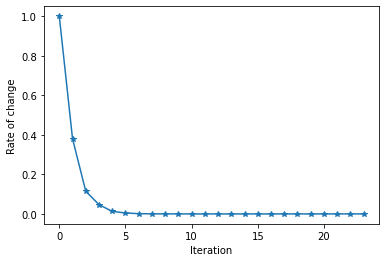

In [100]:
A = np.array(([5,0,2,2],[0,4,0,1], [1,0,-4,0], [0,1,0,-5]), dtype = float)
b = np.array([2,1,4,1])
x, convergence = jacobi(A, b)
x_axis = np.arange(0,len(convergence))
plt.plot(x_axis, convergence, '*-')
plt.xlabel("Iteration")
plt.ylabel("Rate of change")
plt.show()


#### 2.2
To test gauss_seidel I again use the same matrices A and b which should result in the same solution x as using jacobi did. We can see that it finds the same solution in roughly one third of the number of iterations that jacobi-iteration needed. 


Solution x :  [ 0.77922082  0.28571429 -0.80519479 -0.14285714]  



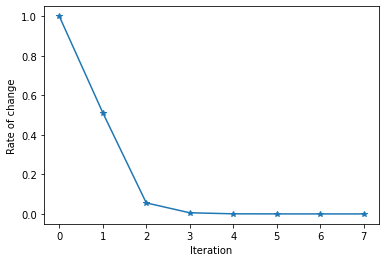

In [102]:
#2.2

if __name__ == "__main__":
  A = np.array(([5,0,2,2],[0,4,0,1], [1,0,-4,0], [0,1,0,-5]), dtype = float)
  #I = np.identity(4)
  b = np.array([2,1,4,1])
  iter = 500
  a1 = 1
  a2 = 1
  x, convergence = gauss_seidel(A, b, iter)
  print("Solution x : ", x, " \n")
  x_axis = np.arange(0,len(convergence))
  plt.plot(x_axis, convergence, '*-')
  plt.xlabel("Iteration")
  plt.ylabel("Rate of change")
   

Test to see that we get both solutions to f(x) = 0 when using different start-values for x 

0.3819660112500109
2.6180340875988275 

Test to verify that the function completes its search even though we start the guess at the point where the df = 0


2.618033988989035



 Plot of the function, with the two zero-intersections found by the function



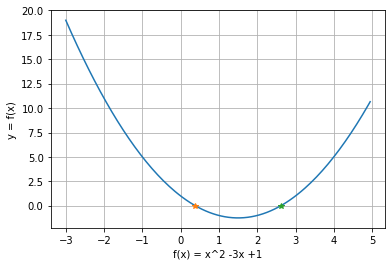

In [98]:
#2.3
if __name__ == "__main__":

  def f(x):
    return x*x -(3 * x) + 1

  def df(x):
    return 2*x - 3

  print("Test to see that we get both solutions to f(x) = 0 when using different start-values for x \n")
  x1, conv1 = newtons_method(f, df, 1) 
  print(x1)
  x2, conv2 = newtons_method(f, df, 10)
  print(x2, "\n")
    
  print("Test to verify that the function completes its search even though we start the guess at the point where the df = 0")
  print("\n")
  x3, conv3 = newtons_method(f, df, 1.5)
  print(x3)
  ##Plot of the function
  xs = np.arange(-3, 5, 0.05)
  ys = []
  for x in xs:
    ys.append(f(x))
  plt.plot(xs, ys)  
  print("\n\n\n Plot of the function, with the two zero-intersections found by the function\n")
  #x_axis = np.arange(0,len(conv1))
  #plt.plot( conv1, '*')

  plt.plot(0.3819660112500109, 0,'*')
  plt.plot(2.618033988749989 ,0, '*')
  plt.grid()
  plt.xlabel("f(x) = x^2 -3x +1")
  plt.ylabel("y = f(x)")


Text(0, 0.5, 'f(x) at iteration i')

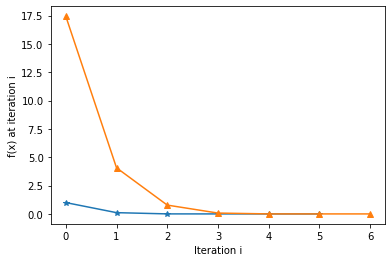

In [101]:
plt.plot([0,1,2,3,4,5], [0,0,0,0,0,0],'-', color = 'white') #just to adjust x-axis
conv1.append(0)
conv2.append(0)
plt.plot(conv1, '*-')
plt.plot(conv2, '^-')
plt.xlabel('Iteration i')
plt.ylabel('f(x) at iteration i')

# **Discussion**

Some useful code for solving linear and non-linear systems of equations was implemented in this lab. Theoretically it is not difficult to understand what the Jacobi and Gauss-Seidel iterative methods are doing, but I did find it confusing to implement in code. I am glad that we had the assignment otherwise I don't think I ever would have thought to try doing so. 

In the Jacobi Iteration if the tolerance for error is decreased by one order of magnitude - every decrease causes the algorithm to require two more iterations to complete. This pattern holds for all tolerances that I tested [1e-2, 1e-11], where TOL = 1e-2 stops on its fifth iteration, and TOL = 1e-11 stops on its twenty-third. 

We see in the last plot that Newton's method in this example needs only one more iteration before it converges when the starting-value is far away from the solution.  